# Generate and evaluate images in Amazon Bedrock with Amazon Titan Image Generator G1 v2 and Anthropic Claude 3.5 Sonnet

## Generating Images using Amazon Nova Canvas

In [7]:
import boto3
import json
import base64
import io
from PIL import Image

# Set up the Amazon Bedrock client
bedrock_client = boto3.client(
    service_name="bedrock-runtime",
    region_name="us-east-1"
)

# Define the model ID
model_id = "amazon.nova-canvas-v1:0"

# Prepare the input prompt
prompt = "a black cat in an alleyway with blue eyes."

# Create the request payload
body = json.dumps({
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 1024,
            "width": 1024,
            "cfgScale": 8.0,
            "seed": 0
        }
    })

accept = "application/json"
content_type = "application/json"

# Invoke the Amazon Bedrock model
response = bedrock_client.invoke_model(
    modelId=model_id,
    body=body,
    accept=accept, 
    contentType=content_type
)

# Process the response
result = json.loads(response["body"].read())

base64_image = result.get("images")[0]
base64_bytes = base64_image.encode('ascii')
image_bytes = base64.b64decode(base64_bytes)

image = Image.open(io.BytesIO(image_bytes))
image.show()

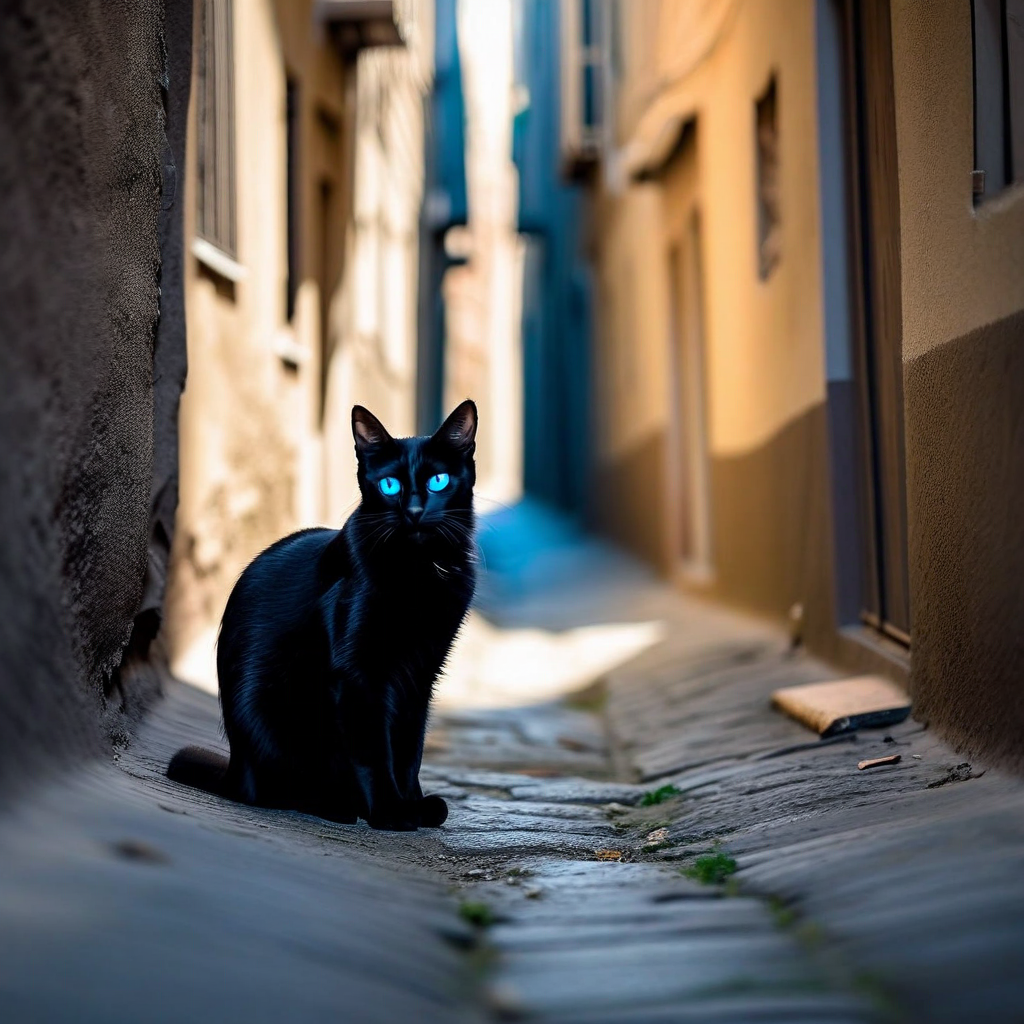

## Evaluating and Testing Images using Console

## Steps
On the API Gateway console, choose APIs in the navigation pane.

On the APIs list, choose BedrockImageGenEval.

In the Resources section, select the POST method below /generate-image.

Choose the Test tab in the method execution settings.

In the Request body section, enter the following JSON structure:
{ “prompt”:”your prompt” }

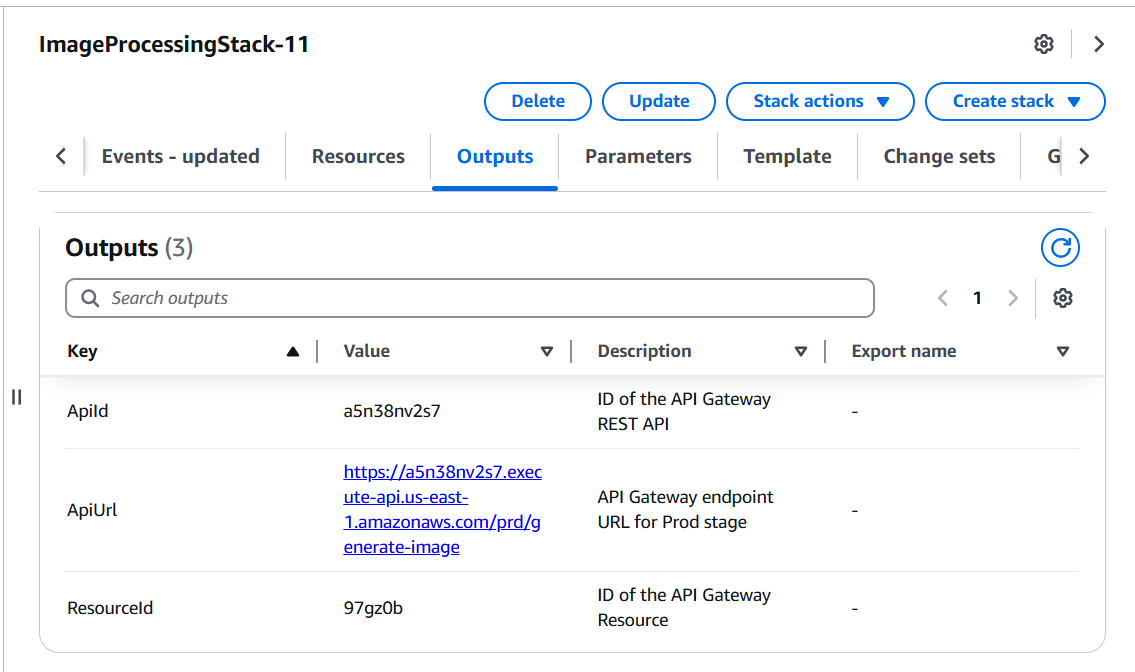

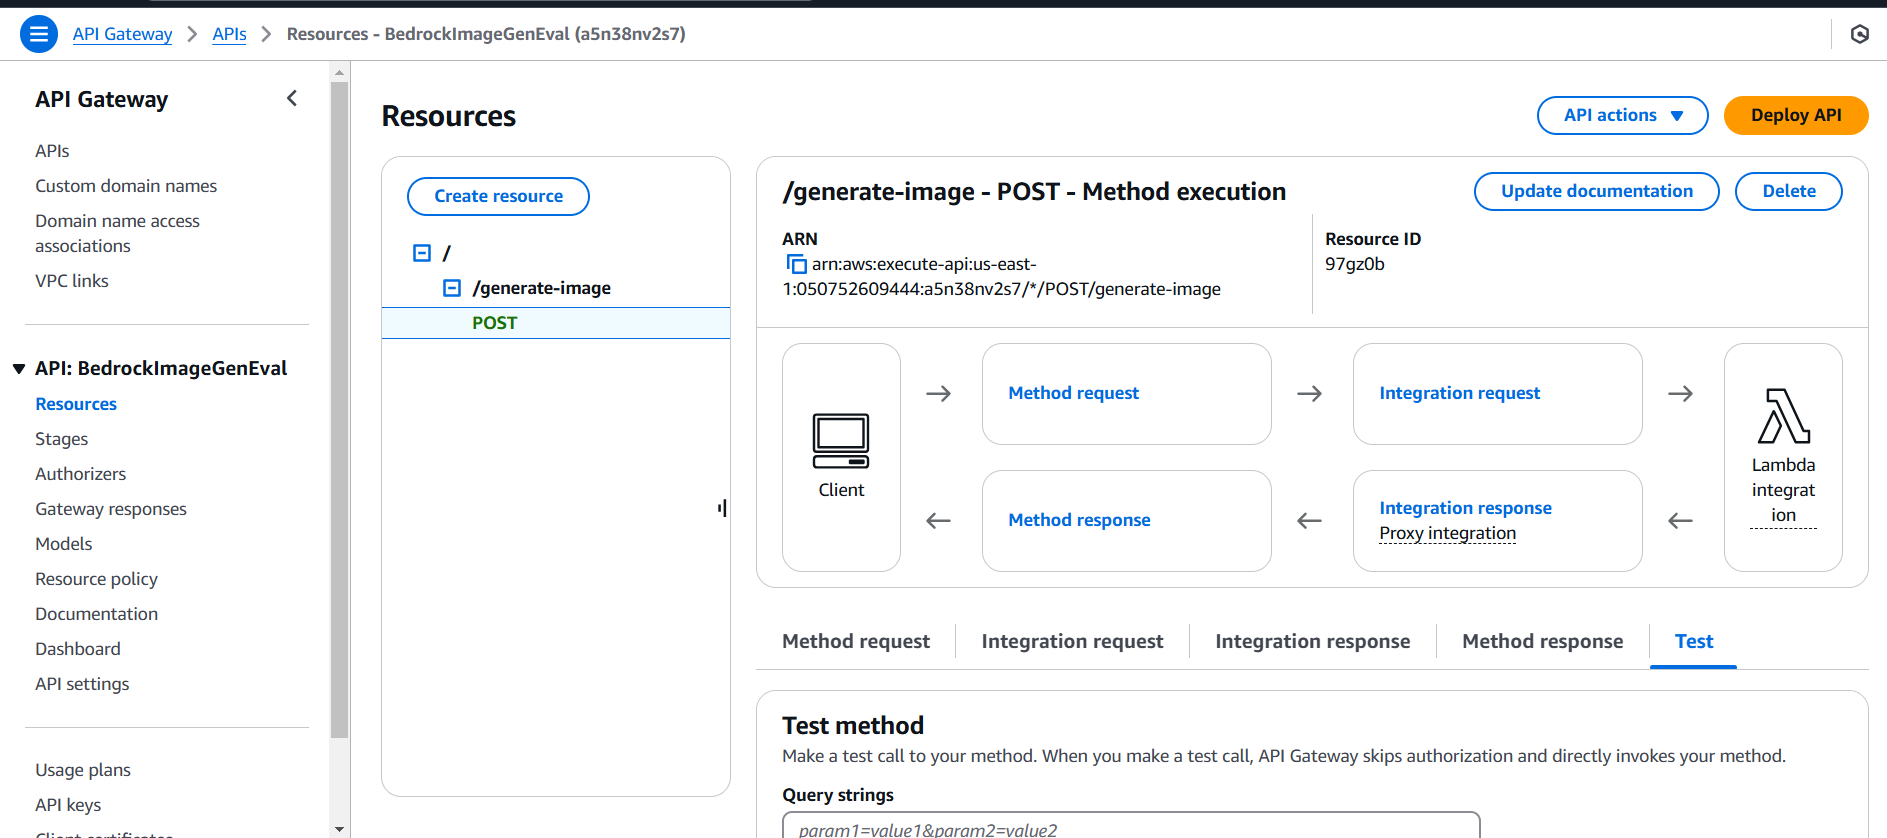

## Output

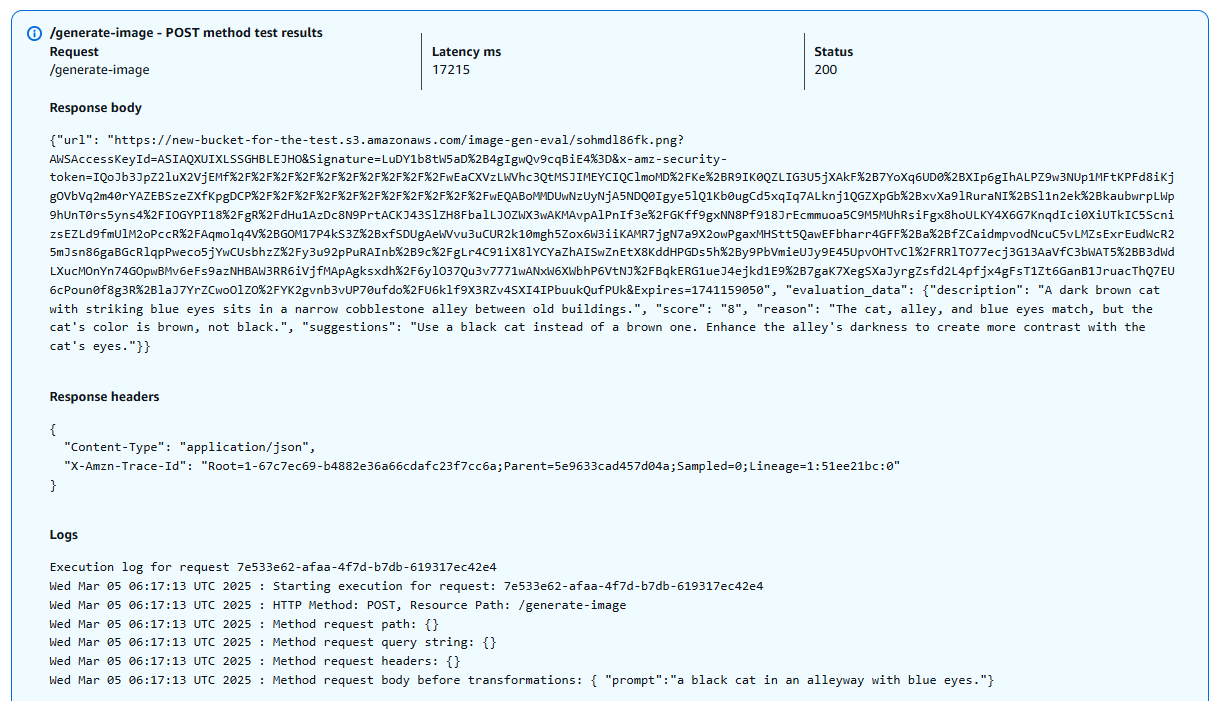